# **Exploration of the taxi trips time series - 2nd Part**

## **Introduction**

In this Jupyter notebook, we will explore further the time series in a visual way in order to make new assumptions to improve the previous statistical models. 

We will see the interactions between the 20 regions we considered and representing 98% of the total taxi trips. We will see which regions are interacting the most, sharing the highest proportions of taxi trips. We will also display a typical week for the entire year 2017. We will identify the outliers in the data too.

## **Setting up the environment**

In [ ]:
#Libraries needed in this notebook
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

data = np.loadtxt("/content/timeseriesuptodec.csv", delimiter=',')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
regions_with_minimum_taxi_trips = [[26, 365168.0], [53, 26872.0], [60, 459962.0], [62, 15995.0], [65, 18050.0], [66, 2536978.0], [67, 21184.0], [68, 59604.0], [72, 750790.0], [73, 96074.0], [75, 155855.0], [76, 716215.0], [77, 1399092.0], [78, 496385.0], [80, 30788.0], [82, 64346.0], [83, 427156.0], [88, 86480.0], [100, 62372.0], [125, 107300.0]]

regions_selected_array = []

for elem in regions_with_minimum_taxi_trips:
  regions_selected_array.append(elem[0])

print("List of region IDs with minimum taxi trips and representing 98% of all taxi flows")
print(regions_selected_array)

List of region IDs with minimum taxi trips and representing 98% of all taxi flows
[26, 53, 60, 62, 65, 66, 67, 68, 72, 73, 75, 76, 77, 78, 80, 82, 83, 88, 100, 125]


In [ ]:
import timeSeriesAnalysis

newFlowTimeSeriesMatrix = timeSeriesAnalysis.returnNewFlowTimeSeriesMatrix(data)
endFlowTimeSeriesMatrix = timeSeriesAnalysis.returnEndFlowTimeSeriesMatrix(data)

## **Matrix of taxi trips by region**


In this section, we build a matrix that contains the list of the 20 regions on rows and columns. An element i,j in the matrix represents the number of trips from region i to region j. In other words, it represents the number of taxi flow starting at region i and ending at region j. We build one matrix for the period January to March 2017.

In [ ]:
import timeSeriesMatrix

#returns an empty square matrix of size the number of regions considered
def returnRegionByRegionNullMatrix(RegionIDsNumber):
  emptyRegionByRegionMatrix = [[0 for j in range(RegionIDsNumber)] for i in range(RegionIDsNumber)]
  return emptyRegionByRegionMatrix

#IMPORTANT: the index returned is only from the array containing the 20 selected regions
#Not the original array containing the 83 regions 
def returnRegionIndexinArray(regionIDvalue, regionsConsideredArray):
  if regionIDvalue in regionsConsideredArray:
    return regionsConsideredArray.index(regionIDvalue)
  return -1

def fillUpRegionbyRegionMatrixWithDF(dataframe, regionByRegionMatrix, regionsConsideredArray):
  for index, row in dataframe.iterrows():
    pickupIndex = returnRegionIndexinArray( row['pickup_regionIDs'], regionsConsideredArray )
    dropoffIndex = returnRegionIndexinArray( row['dropoff_regionIDs'], regionsConsideredArray )
    if pickupIndex >= 0 and  dropoffIndex >= 0:
      prevValue = regionByRegionMatrix[pickupIndex][dropoffIndex]
      regionByRegionMatrix[pickupIndex][dropoffIndex] = prevValue + 1
  
  return regionByRegionMatrix

In [ ]:
csvFilePathArray = ["/content/clean_df_jan.csv","/content/clean_df_feb.csv", '/content/clean_df_mar.csv']

n = len(regions_selected_array)
taxiFlowsRegionByRegionMatrix = returnRegionByRegionNullMatrix(n)

for csvFilePath in csvFilePathArray:
  df = pd.read_csv(csvFilePath)
  taxiFlowsRegionByRegionMatrix = fillUpRegionbyRegionMatrixWithDF(df, taxiFlowsRegionByRegionMatrix, regions_selected_array)

In [ ]:
print(taxiFlowsRegionByRegionMatrix)

[[22361, 1292, 19015, 1517, 1075, 61733, 621, 2079, 22569, 1883, 2182, 21315, 28602, 13733, 176, 2005, 4514, 2288, 2155, 628], [244, 2029, 2011, 122, 63, 1409, 31, 148, 516, 36, 55, 436, 517, 235, 11, 35, 99, 59, 11, 34], [3379, 3944, 55676, 2187, 1226, 41294, 788, 2361, 10804, 969, 1635, 7808, 15000, 4395, 194, 675, 2561, 1032, 197, 911], [83, 53, 605, 201, 56, 309, 24, 56, 54, 10, 21, 30, 72, 32, 2, 18, 27, 8, 6, 7], [49, 50, 895, 147, 446, 989, 139, 575, 91, 11, 78, 58, 85, 58, 4, 46, 33, 26, 5, 7], [32719, 3725, 97878, 3928, 4556, 469064, 6436, 14461, 112757, 15281, 29789, 101509, 195355, 64390, 4741, 12744, 47334, 15007, 7358, 9571], [63, 30, 443, 84, 72, 1933, 267, 364, 246, 19, 191, 208, 651, 115, 31, 62, 158, 36, 21, 19], [79, 140, 2905, 410, 848, 5025, 987, 3696, 534, 89, 442, 429, 446, 387, 41, 266, 292, 194, 16, 33], [13438, 1160, 20633, 585, 519, 111479, 581, 1717, 37276, 6197, 5445, 39195, 62848, 25812, 1267, 2180, 19586, 4110, 3600, 4501], [927, 72, 1703, 64, 51, 13491, 1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


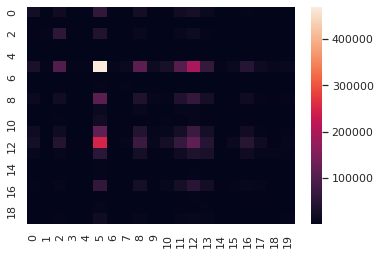

In [ ]:
import seaborn as sns; sns.set()
ax = sns.heatmap(taxiFlowsRegionByRegionMatrix)

In [ ]:
def returnTotalTaxiTripsByRegionMatrix(csvfullfilepathArray, regionsSelectedaArray):
  totaltaxiFlowsRegionByRegionMatrix = returnRegionByRegionNullMatrix(len(regionsSelectedaArray))
  for csvFilePath in csvfullfilepathArray:
    datafr = pd.read_csv(csvFilePath)
    totaltaxiFlowsRegionByRegionMatrix = fillUpRegionbyRegionMatrixWithDF(datafr, totaltaxiFlowsRegionByRegionMatrix, regionsSelectedaArray)
  return totaltaxiFlowsRegionByRegionMatrix

csvFilePathArray = ["/content/clean_df_apr.csv"]
taxiFlowsRegionByRegionMatrix2 = returnTotalTaxiTripsByRegionMatrix(csvFilePathArray, regions_selected_array)

csvFilePathArray = ["/content/clean_df_jun.csv","/content/clean_df_jul.csv", "/content/clean_df_may.csv"]
taxiFlowsRegionByRegionMatrix3 = returnTotalTaxiTripsByRegionMatrix(csvFilePathArray, regions_selected_array)

csvFilePathArray = ["/content/clean_df_aug.csv"]
taxiFlowsRegionByRegionMatrix4 = returnTotalTaxiTripsByRegionMatrix(csvFilePathArray, regions_selected_array)

csvFilePathArray = ["/content/clean_df_sep.csv","/content/clean_df_oct.csv"]
taxiFlowsRegionByRegionMatrix5 = returnTotalTaxiTripsByRegionMatrix(csvFilePathArray, regions_selected_array)

csvFilePathArray = ["/content/clean_df_nov.csv"]
taxiFlowsRegionByRegionMatrix6 = returnTotalTaxiTripsByRegionMatrix(csvFilePathArray, regions_selected_array)

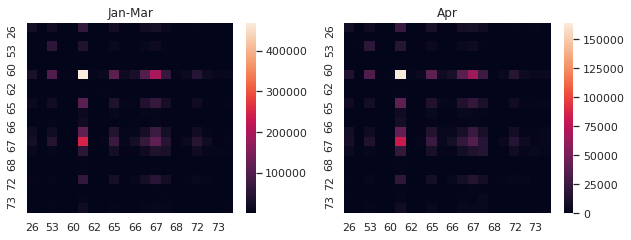

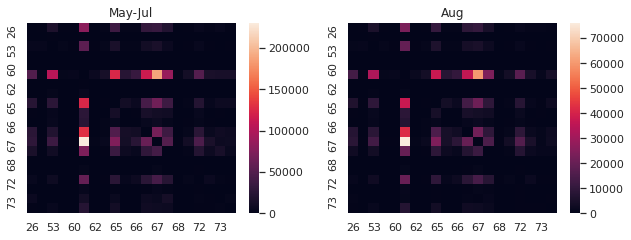

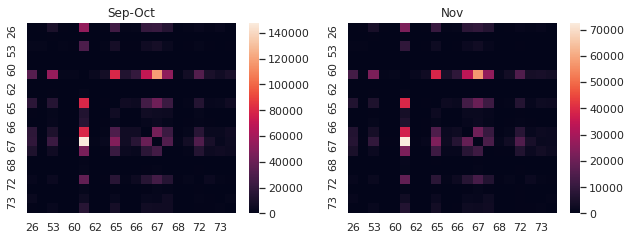

In [ ]:
def removeTaxiTripsStartingEndingSameRegion(regionByRegionMatrix):
  n = len(regionByRegionMatrix)
  i = 0 
  while i < n:
    regionByRegionMatrix[i][i] = 0
    i = i + 1
  return regionByRegionMatrix

def plotHeatMapFor(regionByRegionMatrix, regionByRegionMatrix2, regionIDsLabels, title1, title2, removeElementsfromDiagonal = False):
  if removeElementsfromDiagonal == True:
    regionByRegionMatrix = removeTaxiTripsStartingEndingSameRegion(regionByRegionMatrix)
    regionByRegionMatrix2 = removeTaxiTripsStartingEndingSameRegion(regionByRegionMatrix2)
  
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 3.5))
  sns.heatmap(regionByRegionMatrix, ax=ax1)
  sns.heatmap(regionByRegionMatrix2, ax=ax2)
  ax1.set_xticklabels(regionIDsLabels)
  ax1.set_yticklabels(regionIDsLabels)
  ax2.set_xticklabels(regionIDsLabels)
  ax2.set_yticklabels(regionIDsLabels)
  ax1.set_title(title1, y=-0.1)
  ax2.set_title(title2, y=-0.1)
  fig.tight_layout()
  plt.show()

plotHeatMapFor(taxiFlowsRegionByRegionMatrix, taxiFlowsRegionByRegionMatrix2, regions_selected_array, "Jan-Mar" , "Apr", False)
plotHeatMapFor(taxiFlowsRegionByRegionMatrix3, taxiFlowsRegionByRegionMatrix4, regions_selected_array, "May-Jul" , "Aug", False)
plotHeatMapFor(taxiFlowsRegionByRegionMatrix5, taxiFlowsRegionByRegionMatrix6, regions_selected_array, "Sep-Oct" , "Nov", False)

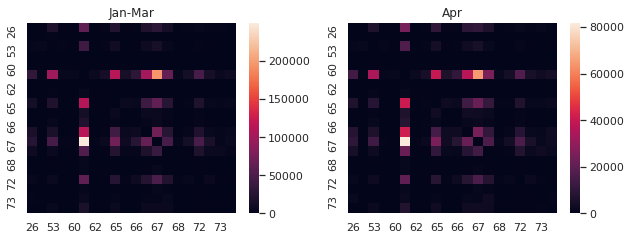

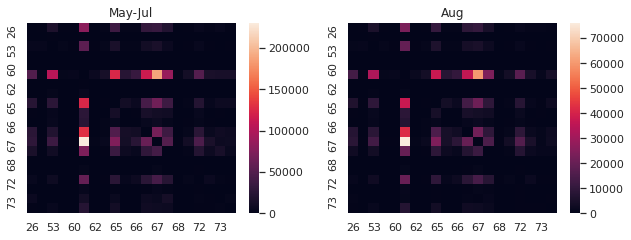

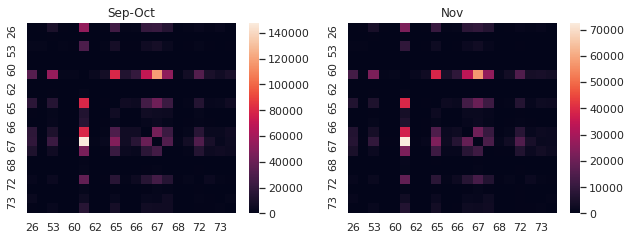

In [ ]:
plotHeatMapFor(taxiFlowsRegionByRegionMatrix, taxiFlowsRegionByRegionMatrix2, regions_selected_array, "Jan-Mar" , "Apr", True)
plotHeatMapFor(taxiFlowsRegionByRegionMatrix3, taxiFlowsRegionByRegionMatrix4, regions_selected_array, "May-Jul" , "Aug", True)
plotHeatMapFor(taxiFlowsRegionByRegionMatrix5, taxiFlowsRegionByRegionMatrix6, regions_selected_array, "Sep-Oct" , "Nov", True)

Looking at the heat maps above, we can notice that some regions are inter-connected. A lot of taxi trips happen between regions 65 and 68, and vice versa. That heat map shows how we can combine the regions together for multivariate forecasting and build models based on the interactions between sets of regions.

## **Analyzing the components of taxi trips time series for region ID 66**

In this section, we will explore the 3 components of taxi trips time series we identified in earlier works: (1) trend component, (2) seasonal component, and (3) residual component that includes noise, events, weather, holidays, and all other events responsible for instantaneous changes in taxi flows.

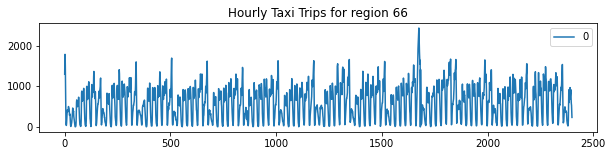

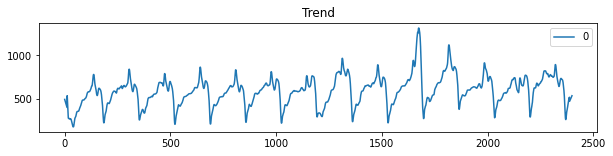

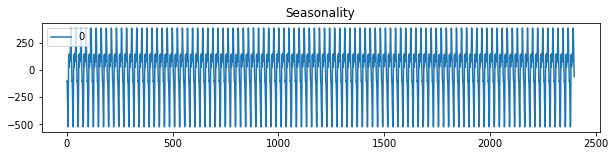

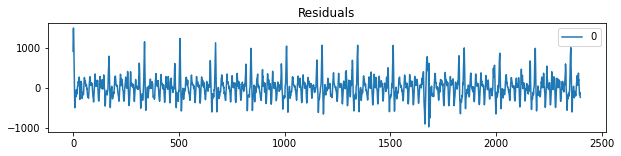

In [ ]:
regionIDSelected = 66
startIndex = 0
endIndex = 24*100
regionIDIndex = timeSeriesMatrix.returnIndexForRegionID(regionIDSelected)

df = pd.DataFrame(newFlowTimeSeriesMatrix[regionIDIndex][startIndex:endIndex])

decomposition = sm.tsa.seasonal_decompose(df, model='additive', freq=24, extrapolate_trend='freq')
decomposition.observed.plot(figsize=(10,2), title='Hourly Taxi Trips for region ' + str(regionIDSelected))
decomposition.trend.plot(figsize=(10,2), title='Trend')
decomposition.seasonal.plot(figsize=(10,2), title='Seasonality')
decomposition.resid.plot(figsize=(10,2), title='Residuals')

In [ ]:
residuals = decomposition.resid
print(residuals[0][:])

0        905.742565
1       1397.886183
2       1488.728552
3       1324.160920
4        971.269330
           ...     
2395    -177.881004
2396    -166.676695
2397    -123.791553
2398    -222.093911
2399    -244.238353
Name: 0, Length: 2400, dtype: float64


Let's decompose the residue per hour and per day, and plot the results. There seems to be a time dependency.

We create a matrix containing 24 columns representing the 24h in a day. It has 8 rows for each day of the week plus we add another day for holidays.

In [ ]:
!pip install holidays

In [ ]:
import datetime
from datetime import date
from datetime import timedelta

import holidays

us_holidays = holidays.UnitedStates()

holidayEncoding = 0

#emptyDayByHourMatrix = [[[] for j in range(8)] for i in range(24)]

def isDateaHoliday(index, startingDate = [2017, 1, 1]):
  dateValue = datetime.datetime(startingDate[0], startingDate[1], startingDate[2]) + datetime.timedelta(hours=index)
  if dateValue in us_holidays:
    return True
  return False

def returnDayIndexFor(index, startingDate = [2017, 1, 1]):
  fulldate = datetime.datetime(startingDate[0], startingDate[1], startingDate[2]) + datetime.timedelta(hours=index)
  
  return fulldate.isoweekday()

def returnCorrespondingHourFor(index):
  ndays, nhour = divmod(index, 24)
  return nhour

def clusterResidueByDayByHour(residuetimeseries, startingIndex, endingIndex):
  n = len(residuetimeseries)
  i = startingIndex
  if endingIndex > n :
    endingIndex = n
  emptyHourByDayMatrix = [[[] for j in range(8)] for i in range(24)]
  while i < endingIndex:
    dayIndex = returnDayIndexFor(i)
    hourindex = returnCorrespondingHourFor(i)
    if isDateaHoliday(i):
      dayIndex = 8
    hourDayArray = emptyHourByDayMatrix[hourindex][dayIndex-1]
    hourDayArray.append(residuetimeseries[i])
    emptyHourByDayMatrix[hourindex][dayIndex-1] = hourDayArray
    i = i + 1
  return emptyHourByDayMatrix

In [ ]:
residuesHourByDayMatrix = clusterResidueByDayByHour(residuals[0][:], 0 , 2400)

In [ ]:
print(residuesHourByDayMatrix[23])

[[-221.46661070350248, -231.9457773701691, -258.98744403683577, -261.90411070350245, -232.07077737016905, -199.00827737016905, -217.09161070350243, -163.29994403683574, -175.27911070350243, -189.36244403683574, -118.92494403683591, -244.238352853257], [-212.633277370169, -272.9249440368358, -262.13327737016897, -209.38327737016905, -207.9874440368359, -246.86244403683568, -135.25827737016917, -204.79994403683574, -186.46661070350243, -191.54994403683568, -243.44577737016917, -221.6541107035023, -154.50827737016905, -141.21661070350243], [-246.65411070350243, -215.9041107035023, -203.25827737016905, -215.3624440368358, -166.5291107035023, -228.69577737016917, -164.63327737016905, -124.36244403683568, -166.11244403683557, -189.88327737016905, -231.11244403683568, -180.46661070350243, -257.02911070350234, -127.92494403683568], [-252.54994403683557, -70.75827737016894, 1.2000559631641963, -151.73744403683568, -99.9249440368358, -128.84161070350243, -31.508277370168948, 13.01255596316431, -

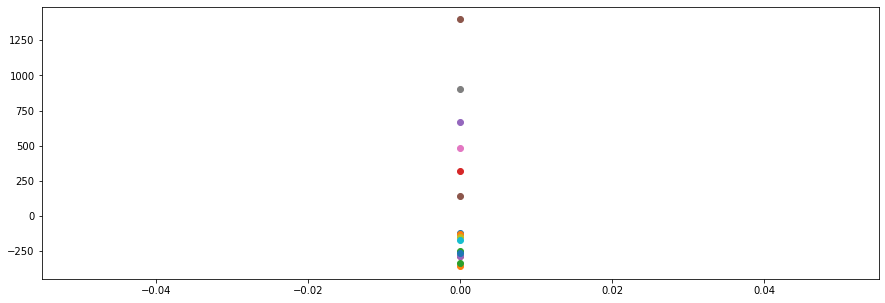

In [ ]:
x = residuesHourByDayMatrix[0][0]
y = residuesHourByDayMatrix[0][1]

i = 0

labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Hol"]

while i < 2:
  for elem in residuesHourByDayMatrix[i]:
    #for subelem in elem:
    plt.plot(elem[0], marker="o", linestyle="-", label=labels)
    #plt.plot(elem[1], marker="x", linestyle="--", label=labels)
  i = i + 1
plt.show()